<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA_white_fxed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [132]:
pip install factor_analyzer

Datahandling of the white wine data.

In [133]:
data_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Factor analysis of white wine quality, by the use of module factor-analyzer

In [134]:
fa = FactorAnalyzer(n_factors=2, rotation=None)

data_white_dropped = data_white.drop(columns=['quality'])
X = StandardScaler().fit_transform(data_white_dropped)
# Fit the factor analysis model
fa.fit(X)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=2, rotation=None, rotation_kwargs={},
            use_smc=True)


# Get factor loadings, eigenvalues, etc.
loadings = fa.loadings_

eigenvalues, _ = fa.get_eigenvalues()

loadings_df = pd.DataFrame(loadings,
                           index=data_white_dropped.columns,   # Set the row index to be the feature names
                           columns=["Factor 1", "Factor 2"])  # Name factors

# Display the DataFrame of factor loadings
print(loadings_df)



                      Factor 1  Factor 2
fixed acidity         0.252468 -0.643702
volatile acidity      0.010059  0.026082
citric acid           0.194009 -0.254270
residual sugar        0.708303  0.009011
chlorides             0.290711  0.001322
free sulfur dioxide   0.436203  0.263546
total sulfur dioxide  0.645256  0.250533
density               0.981522 -0.003171
pH                   -0.190984  0.554257
sulphates             0.057949  0.141974
alcohol              -0.721755 -0.040094


Representation of the factors in a heatmap

<Axes: >

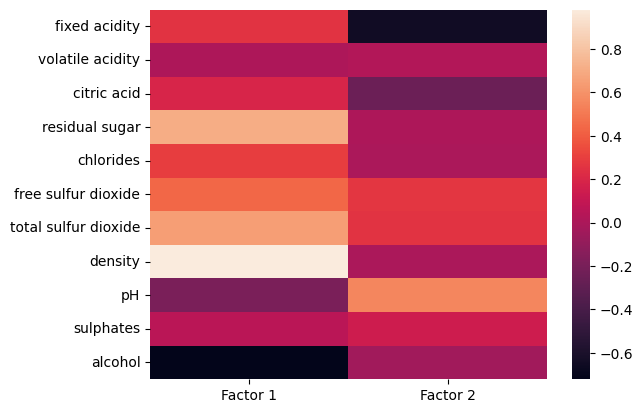

In [173]:
sns.heatmap(loadings_df)


In [136]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
communalities = loadings ** 2  # Square the factor loadings
communalities = communalities.sum(axis=1)  # Sum the squared loadings across factors (row-wise sum)

# Convert communalities into a DataFrame (optional for better readability)
communalities_df = pd.DataFrame(communalities, index=data_white_dropped.columns, columns=['Communality'])

communalities_df

,Communality
fixed acidity,0.478092
volatile acidity,0.000781
citric acid,0.102293
residual sugar,0.501774
chlorides,0.084514
free sulfur dioxide,0.259730
total sulfur dioxide,0.479122
density,0.963396
pH,0.343676
sulphates,0.023515


ValueError: operands could not be broadcast together with shapes (11,11) (10,10) 

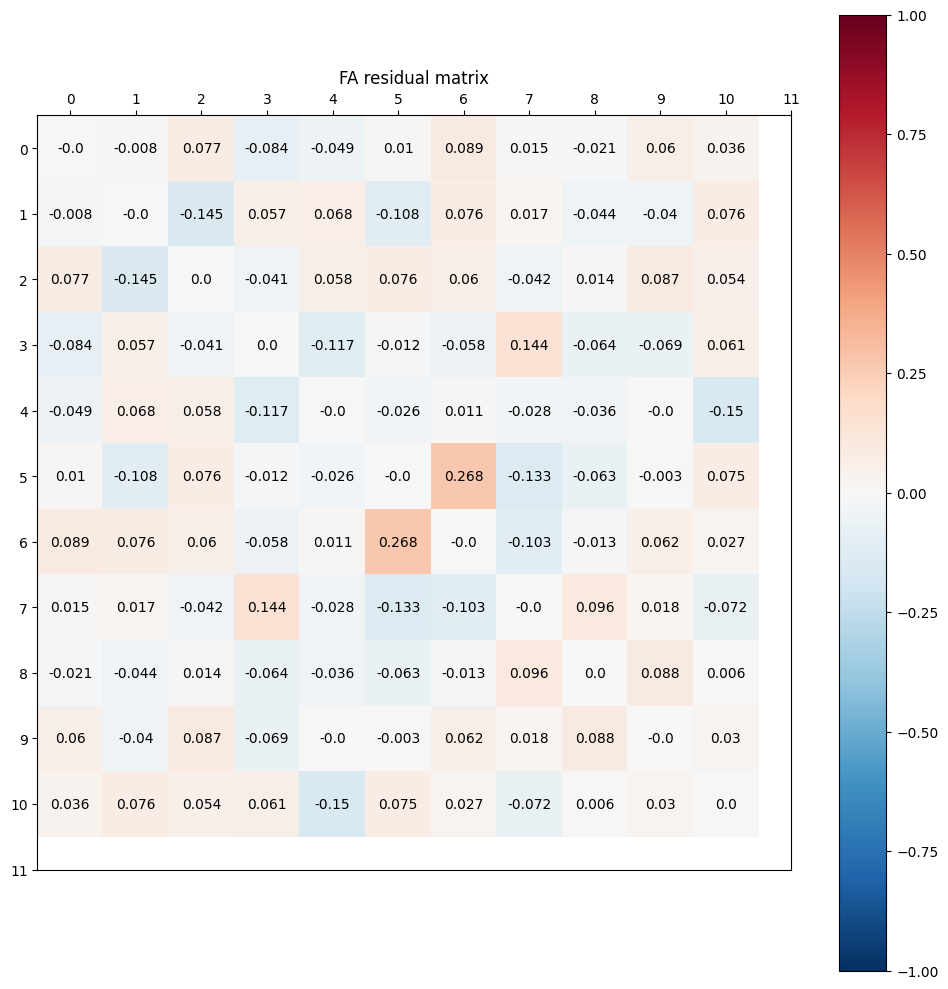

In [139]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(12))
ax.set_yticks(range(12))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

In [193]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_white_dropped, 3)
res_w = mod_w.fit()
res_w.rotate('quartimax')
communality = res_w.communality
print(res_w.communality)
res_w.get_loadings_frame(threshold=0.5)


[0.57779158 0.00546568 0.14667013 0.48566394 0.07718203 0.48937477
 0.78774832 1.40606732 0.3125896  0.02371634 0.47725439]


,factor 0,factor 1,factor 2
density,-1.183752,0.033908,0.060404
residual sugar,-0.676747,0.049028,0.158978
alcohol,0.654851,-0.052868,-0.213611
chlorides,-0.239426,0.055482,0.129533
fixed acidity,-0.166678,0.741184,-0.025623
pH,0.121210,-0.544364,0.039564
citric acid,-0.092467,0.347148,0.132697
volatile acidity,-0.037221,-0.051985,-0.037120
total sulfur dioxide,-0.414463,0.004384,0.784824
free sulfur dioxide,-0.217450,-0.051173,0.662926


In [194]:
uniqueness = np.diag(1 - communalities)

# Get the factor loadings (this is the lambda matrix)
lambda_ = res_w.loadings

# Construct the psi (diagonal matrix of uniquenesses)

# Get the correlation matrix (s)
s = np.corrcoef(np.transpose(X))

# Calculate the sigma matrix: sigma = lambda_.T * lambda_ + psi
# Since lambda_ is (n_variables, n_factors), we need to calculate lambda_ @ lambda_.T
sigma = np.matmul(lambda_, lambda_.T) + uniqueness

# Calculate residuals: residuals = s - sigma
residuals = s - sigma

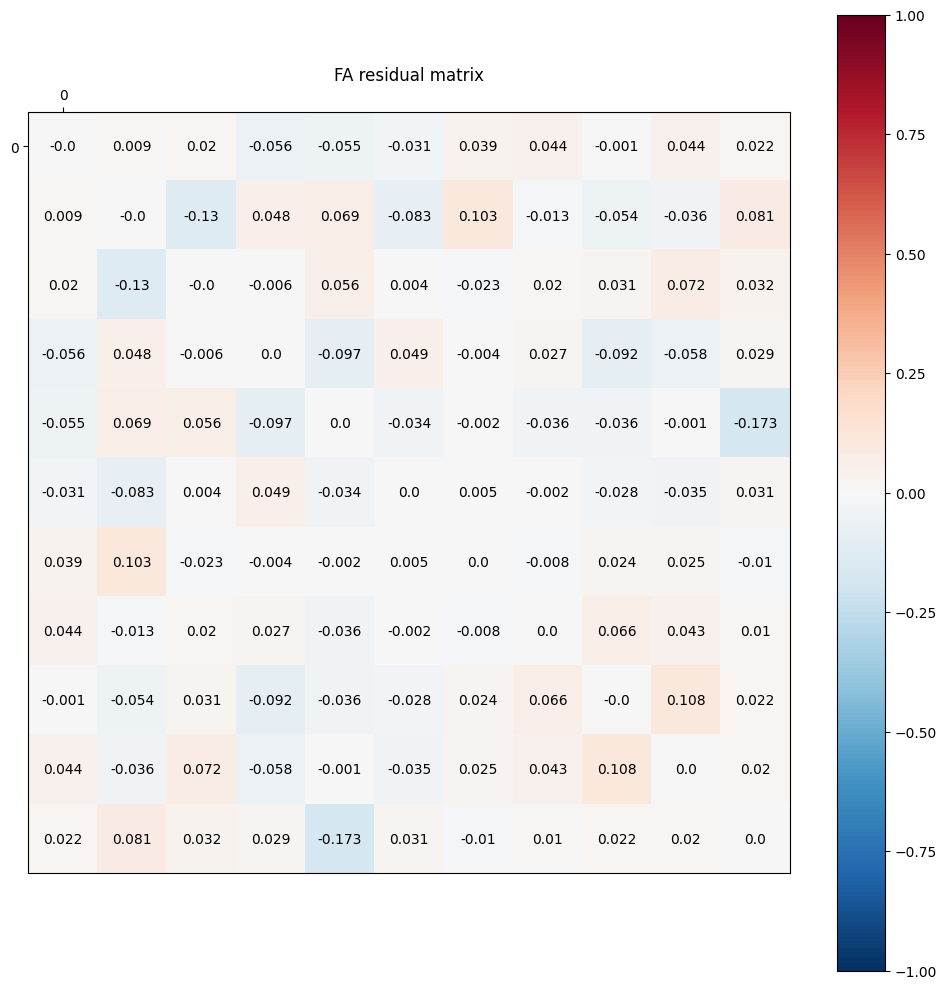

In [195]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(1))
ax.set_yticks(range(1))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

Three factors can be described as sweetness, sourness and roughness.

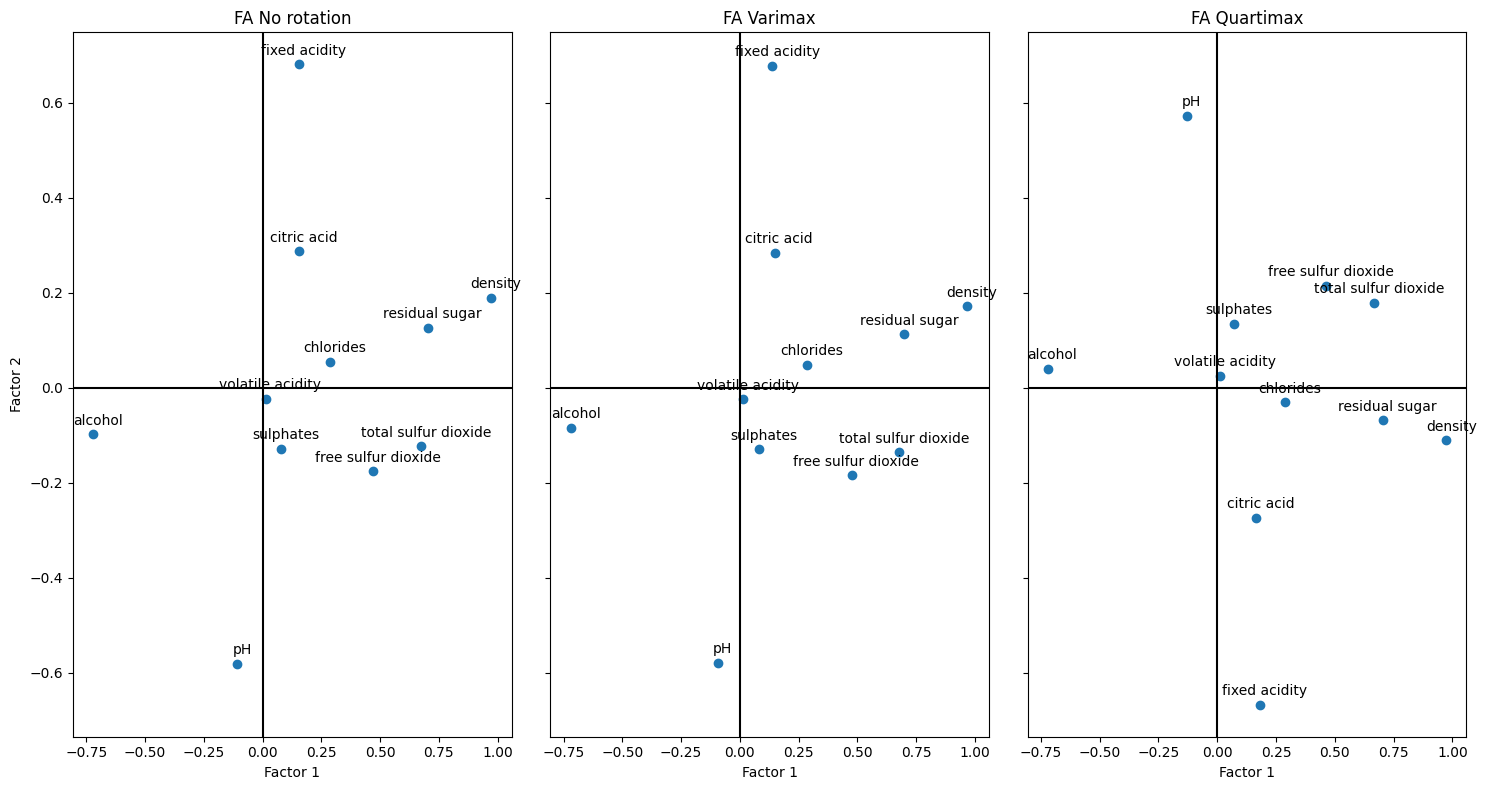

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# Standardize the data (assuming data_white is your dataset)


# Define different factor analysis methods with rotations
methods = [
    ("FA No rotation", FactorAnalyzer(2)),
    ("FA Varimax", FactorAnalyzer(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(2, rotation="quartimax")),
]

# Create subplots with shared x and y axes
fig, axes = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)

for ax, (method_name, fa) in zip(axes, methods):
    # Fit the FactorAnalyzer model
    fa.fit(X)

    # Get the factor loadings (not components)
    loadings = fa.loadings_

    # Plot scatter of factor loadings for Factor 1 and Factor 2
    ax.scatter(loadings[:, 0], loadings[:, 1])

    # Draw lines for x=0 and y=0
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')

    # Annotate the points with variable names
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    # Set the title for each subplot
    ax.set_title(method_name)

    # Set labels
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 2")
    ax.set_xlabel("Factor 1")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Volatile acidity will be dropped due to the reason of having zero impact on the wine quality/taste, according to the scatter plot above. Volatile acidity is very close to zero when comparing two factors. While dropping volatile acidity one of the communality values will still be above one which indiciates a Heywood case. Density is the one having a communality value above one, which means it should be dropped as well.


What can be noticed in terms of the factors distribution that density, residual sugar, alcohol and chlorides are factored togheter which can describe the sweetness of the wine. Fixed acidity, pH and Citric acid describes the sourness of the wine. Lastly, total suflur dioxide, free sulfur dioxide and sulphates may represent the roughness of the wine.

In [166]:
data_white_dropped2 = data_white_dropped.drop(columns=['volatile acidity'])
mod_w2 = Factor(data_white_dropped2, 3)
res_w3 = mod_w2.fit()
res_w3.rotate('quartimax')
print(res_w3.communality)
res_w3.get_loadings_frame(threshold=0.4)

[0.56207899 0.13420032 0.47927136 0.07672974 0.42423692 0.8978535
 1.4368611  0.33076125 0.0242046  0.47352103]


,factor 0,factor 1,factor 2
density,-1.195444,-0.031127,-0.082500
residual sugar,-0.667355,-0.055811,-0.175482
alcohol,0.647147,0.051770,0.228126
chlorides,-0.232229,-0.059994,-0.138564
fixed acidity,-0.164386,-0.731353,0.013395
pH,0.117300,0.562160,-0.031281
citric acid,-0.096614,-0.331726,-0.121752
total sulfur dioxide,-0.381373,-0.008705,-0.867371
free sulfur dioxide,-0.213956,0.059542,-0.612303
sulphates,-0.022465,0.090914,-0.124236


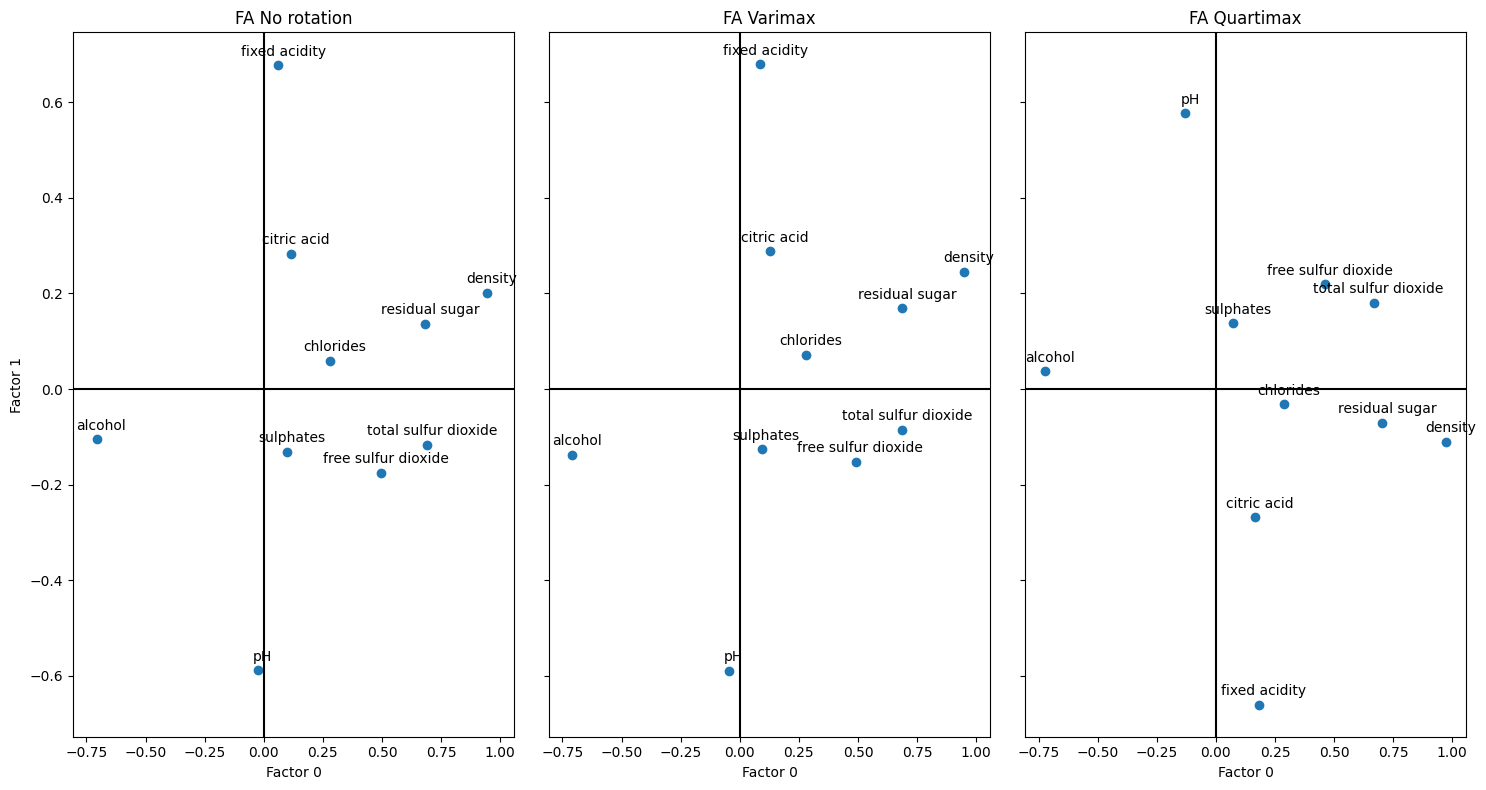

In [169]:
methods = [
    ("FA No rotation", FactorAnalyzer(2)),
    ("FA Varimax", FactorAnalyzer(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)

for ax, (method_name, fa) in zip(axes, methods):
    fa.fit(data_white_dropped2)

    loadings = fa.loadings_


    ax.scatter(loadings[:, 0], loadings[:, 1])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')

    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white_dropped2.columns[i], ha="center")

    ax.set_title(method_name)


    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 0")


plt.tight_layout()
plt.show()

Here we drop Density as well to see if there is better distribution of the factors and see if all the communality values will be below one. Instead one can see another communality value increasing and again we will have a Heywood case. Since the variables are based on each other, dropping variables will have no difference in the end result.

The threshold value indicates that sulphates, citric acid and residual sugar should be negecleted when considering the factors but not dropped since there data is still valuable to understand the overall quality.

Without dropping density or volatile acidity, the threshold values still indicates that sulphates, citric acid and residual sugar should be negelected when factoring all of the variables, because it may or may not have an impact on the overall quality.

In [172]:
data_white_dropped2 = data_white_dropped.drop(columns=['volatile acidity', 'density'])
mod_w2 = Factor(data_white_dropped2, 3)
res_w3 = mod_w2.fit()
res_w3.rotate('quartimax')
print(res_w3.communality)
res_w3.get_loadings_frame(threshold=0.4)

[0.52867301 0.13512995 0.26923079 0.11265329 0.4588633  0.85203674
 0.36288338 0.02777226 1.07842742]


,factor 0,factor 1,factor 2
total sulfur dioxide,-0.882238,-0.024786,0.270330
free sulfur dioxide,-0.663216,0.047652,0.129374
sulphates,-0.136819,0.092147,-0.023701
fixed acidity,-0.025611,-0.724077,0.061075
pH,-0.028959,0.587440,-0.130225
citric acid,-0.140909,-0.337143,0.040119
alcohol,0.196840,0.039796,-1.018871
residual sugar,-0.344375,-0.147812,0.358871
chlorides,-0.107919,-0.051977,0.313536
